In [65]:
%autosave 1

Autosaving every 1 seconds


In [66]:
!pwd

/Users/mirfarhanali/Desktop/NLP


In [67]:
!pip install ml_datasets

In [68]:
from ml_datasets import imdb
train_data, valid_data = imdb()

In [69]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm
import pandas as pd 
import matplotlib.pyplot 
import seaborn as sns 
sns.set(style ="darkgrid")
sns.set(font_scale = 1.3)

In [70]:
df = pd.read_csv('train.csv')

In [71]:
df.head(10)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1


In [72]:
df.count()

review_id          17494
title              17494
year               17316
user_review        17494
user_suggestion    17494
dtype: int64

In [73]:
df = df[['user_review', 'user_suggestion']]

In [74]:
df.head()

,user_review,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [75]:
df.count()

user_review        17494
user_suggestion    17494
dtype: int64

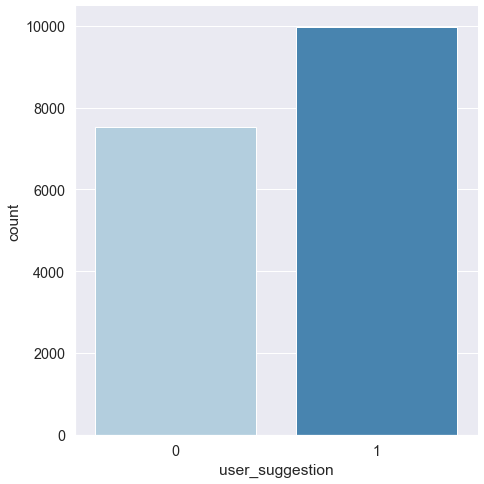

In [76]:
sns.catplot(x="user_suggestion", data = df, kind = "count", height = 7, aspect = 1, palette = "Blues")


In [77]:
nlp = spacy.load("en_core_web_sm")
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [78]:
textcat = nlp.add_pipe("textcat")

In [79]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'textcat']

In [80]:
textcat.add_label("RECOMMENDED")
textcat.add_label("DONT BUY")

1

In [81]:
df['tuples'] = df.apply(lambda row : (row['user_review'], row['user_suggestion']), axis = 1)
train = df['tuples'].tolist()
train[:2]

[("I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",
  1),
 ("Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bo

In [82]:
import random
def load_data(limit = 0, split = 0.8):
    train_data = train
    random.shuffle(train)
    texts,labels = zip(*train_data)
    cats = [{"RECOMMENDED" : bool(y), "DON'T BUY" : not bool(y)} for y in labels]
    split = int(len(train_data)*split)
    return (texts[:split], cats[:split]), (texts[:split], cats[:split])
n_texts = 13995
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit = n_texts)
train_data = list(zip(train_texts,[{"cats" : cats} for cats in train_cats]))
train_data[:2]
   
    

[("I don't know what TF Is going on.... i love it chaos everywhere this is a game engineered for my species for sure! HAHAHA there is always like 2 purple guys and 200 red and blue hahaha they loose their territory in no time. Sadly all those guys who paid are op and also it was cool on the beta where everything was affordable no it takes 3 decades of grinding to get an underpowered gun damn 7/10.... yeah you heard me :(",
  {'cats': {'RECOMMENDED': True, "DON'T BUY": False}}),
 ("CATALÀ ( BELOW ENGLISH)PROS- Equips de 7 jugadors depens menys de l'equip- no hi ha cargadors ni coses rarres (de momenet)- requisits baixosCONTRAS- partides desequilibradas- no hi ha clan wars- necessitas dos mesos pert treure un tier 10- casi no pots jugar els tancs guapos perque no els pots mantindre- Wargaming se l'hi enrefot el client- la tendencia de wargaming tendeix a enpitjorar els jocs-el no haver-hi cap artilleria hi ha molts campers, es a dir els anttanks sorten extremadament beneficiats..ENGLISHP

In [87]:
from spacy.util import minibatch, compounding
#number of iteration n = some integer
n_iter = 10;
#disabling the other components
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "textcat"]
with nlp.disable_pipes(*other_pipes): #we are only training textcat
    optimizer = nlp.create_optimizer()
    
#     print("Training the model.....Please wait until the training is finished before moving on to the test")
# #training the model
#     for i in range(n_iter):
#         losses = {} #losses: It is a type of dictionary, it is taking an optional record of the loss during training
#         batches = minibatch(train_data, compounding(4., 32., 1.0001))
#         for batch in batches:
#             texts, annotations = zip(*batch)
#             example =[]
#             for i in range(len(texts)):
#                 doc = nlp.make_doc(texts[i])
#                 example.append(Example.from_dict(doc, annotations[i]))
#             nlp.update(example, drop = 0.2, losses = losses)

In [169]:
def make_docs(data):
    docs = []
    for doc,label in nlp.pipe(data, as_tuples = True):
        if label == "pos":
            doc.cats["Positive"] = 0
            doc.cats["Negative"] = 1
        else:
            doc.cats["Positive"] = 1
            doc.cats["Negative"] = 0
        docs.append(doc)
    return(docs)

In [133]:
num_texts = 13995
train_docs = make_docs(train_data[:num_texts])
doc_bin = DocBin(docs = train_docs)
doc_bin.to_disk("./NLP/train.spacy")

valid_docs = make_docs(valid_data[:num_texts])
doc_bin = DocBin(docs = valid_docs)
doc_bin.to_disk("./NLP/valid.spacy")


In [170]:
text = "The game was shit"

In [171]:
nlp = spacy.load("./trained/model-best")


In [172]:
doc = nlp(text)
print(doc.cats)

{'Positive': 0.5204477906227112, 'Negative': 0.4685137867927551}


In [137]:
print(text)

I absolutely loved the game
